# Capstone Project: Exploratory Data Analysis of Global Unicorn Companies

This notebook presents a comprehensive analysis of unicorn companies (startups valued over $1B). The analysis includes data cleaning, missing data handling, investor breakdowns, funding metrics, time-to-unicorn calculations, and visualizations that reveal both global trends and detailed insights. The results are intended to guide stakeholders in identifying high-growth regions and sectors.

## Project Objectives & Deliverables

**Objectives:**
- Clean and preprocess the dataset (including handling missing and unknown funding data).
- Engineer key features such as 'Year Joined' and 'Time to Unicorn'.
- Provide detailed breakdowns by investors, funding totals per country, and time-based analyses.
- Visualize client-specific subsets (e.g., hardware companies in Beijing, San Francisco, London; AI companies in London) along with extended insights (global maps, US city analysis).

**Deliverables:**
1. Cleaned and preprocessed dataset with derived features.
2. Visualizations for missing data, investor breakdown, funding metrics, and time-to-unicorn.
3. Global maps and regional analyses using log-transformed scales and the 'verdis' palette.
4. Extended insights and recommendations for stakeholders.

## 1. Library Imports

The following libraries are used for data processing and visualization. All plots use the `verdis` palette.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Pandas version: 2.2.3
Seaborn version: 0.13.2


## 2. Data Loading & Initial Exploration

Load the dataset and display basic information. Update the file path as needed.

In [2]:
# Replace 'your_unicorn_data.csv' with the actual data file path
df = pd.read_csv('Unicorn_Companies.csv')

print(df.head())
print('Data shape:', df.shape)
df.info()
df.describe(include='all')

     Company Valuation Date Joined                         Industry  \
0  Bytedance     $180B      4/7/17          Artificial intelligence   
1     SpaceX     $100B     12/1/12                            Other   
2      SHEIN     $100B      7/3/18  E-commerce & direct-to-consumer   
3     Stripe      $95B     1/23/14                          Fintech   
4     Klarna      $46B    12/12/11                          Fintech   

            City Country/Region      Continent  Year Founded Funding  \
0        Beijing          China           Asia          2012     $8B   
1      Hawthorne  United States  North America          2002     $7B   
2       Shenzhen          China           Asia          2008     $2B   
3  San Francisco  United States  North America          2010     $2B   
4      Stockholm         Sweden         Europe          2005     $4B   

                                    Select Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fishe

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074.000000,1074,1073
unique,1073,30,639,16,256,46,6,NaN,539,1058
top,Bolt,$1B,7/13/21,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,NaN,60,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.895717,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.698573,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN


## 3. Missing Data & Cleanup

### 3.1 Missing Data Diagnosis
Identify missing values and visualize missingness. (Requires the `missingno` package.)

Missing values per column:
Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64


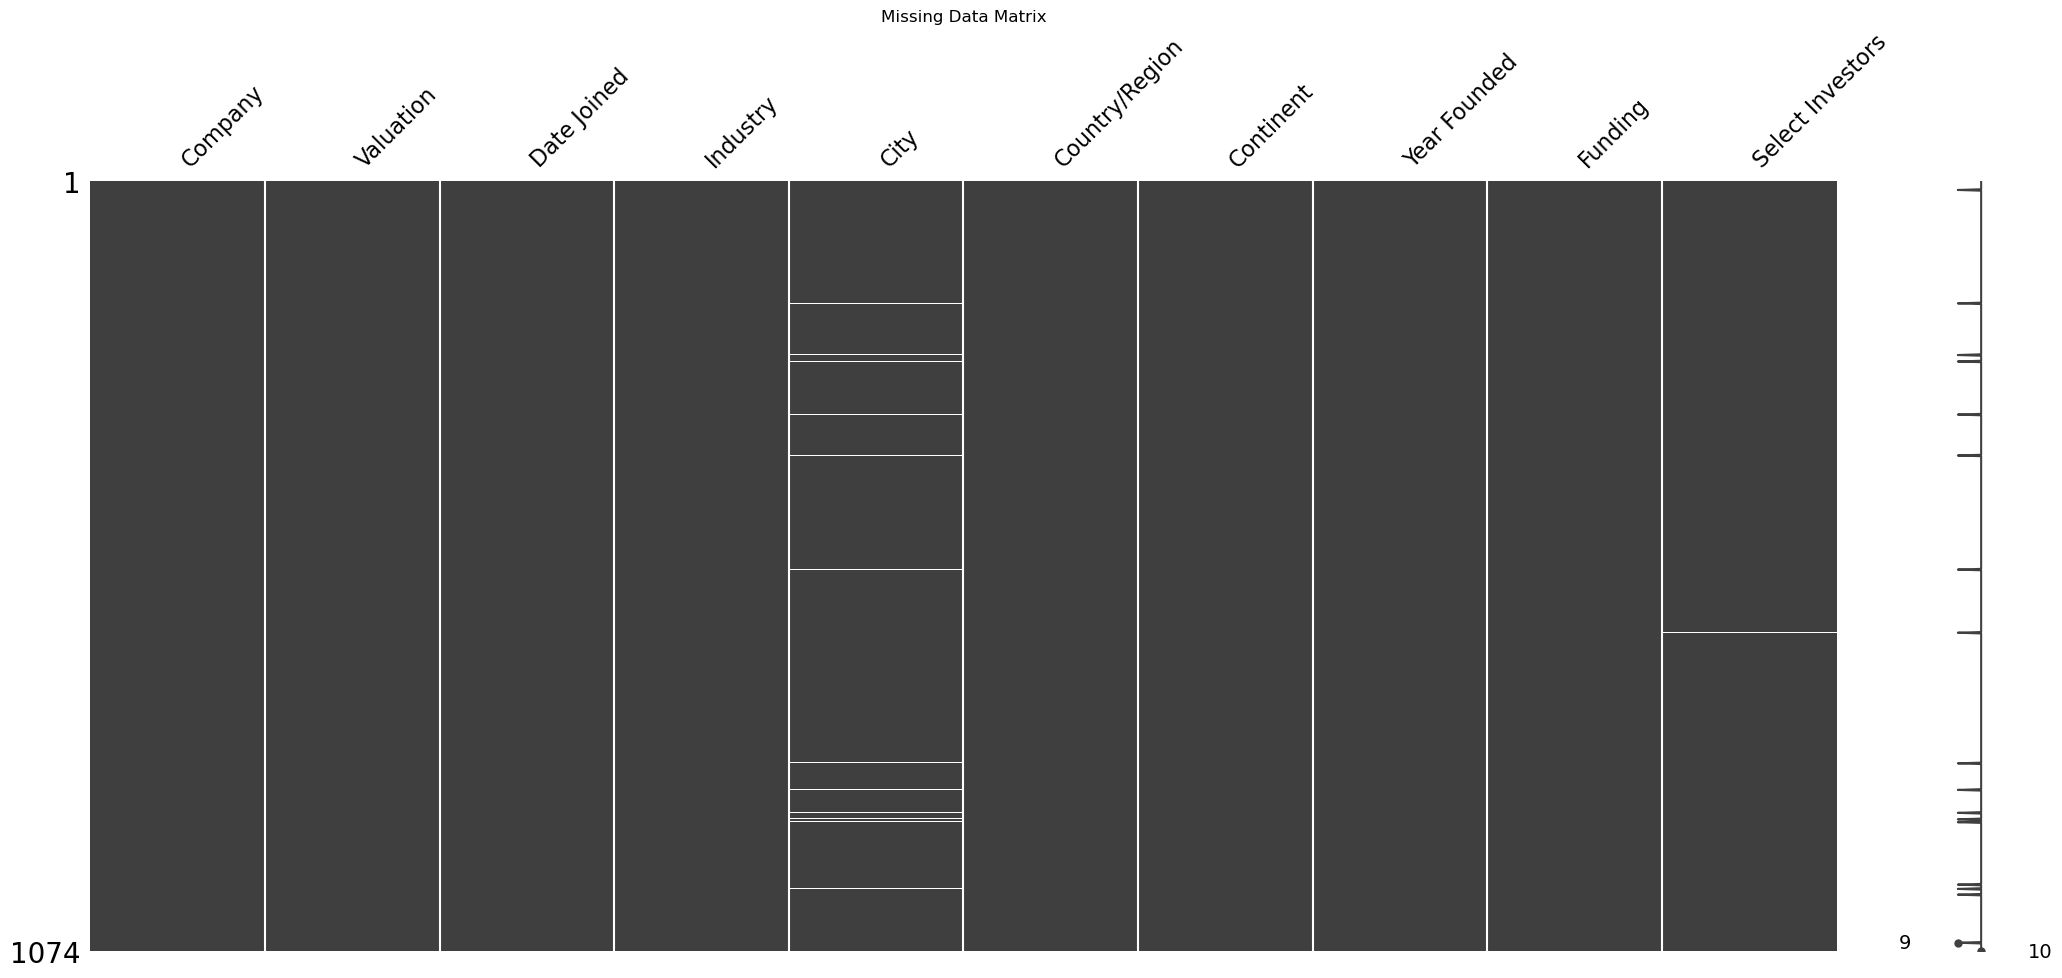

In [3]:
print('Missing values per column:')
print(df.isnull().sum())

try:
    import missingno as msno
    msno.matrix(df)
    plt.title('Missing Data Matrix')
    plt.show()
except ImportError:
    print('missingno not installed. Install with pip install missingno')

### 3.2 Cleaning Unknown Funding Data
Replace or flag rows with unknown funding values as needed before further analysis.

In [4]:
# Example: If 'Funding' column has 'Unknown' or missing, fill with 0 or flag them
df['Funding'] = df['Funding'].replace('Unknown', np.nan)
df['Funding'] = df['Funding'].fillna(0)

# Optionally, convert funding strings (like '$765M', '$5B') to numeric
def convert_funding(x):
    if isinstance(x, str):
        x = x.replace('$','')
        if 'B' in x:
            return float(x.replace('B','')) * 1e3  # convert billions to millions
        elif 'M' in x:
            return float(x.replace('M',''))
    return float(x)

df['Funding (M)'] = df['Funding'].apply(convert_funding)
print(df[['Funding', 'Funding (M)']].head())

  Funding  Funding (M)
0     $8B       8000.0
1     $7B       7000.0
2     $2B       2000.0
3     $2B       2000.0
4     $4B       4000.0


## 4. Data Cleaning & Feature Engineering

### 4.1 Convert and Clean Key Columns
Convert valuation to numeric and dates to datetime. Extract the year a company joined and calculate time-to-unicorn.

In [5]:
# Convert 'Valuation' from string (e.g., '$12B') to float
df['Valuation ($B)'] = df['Valuation'].str.replace('$', '', regex=False).str.replace('B', '', regex=False).astype(float)
print(df[['Valuation', 'Valuation ($B)']].head())

# Convert 'Date Joined' to datetime and extract year
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year
print(df[['Date Joined', 'Year Joined']].head())

# Calculate time to unicorn (in years) as the difference between 'Year Joined' and 'Year Founded'
df['Time to Unicorn'] = df['Year Joined'] - df['Year Founded']
print(df[['Year Founded', 'Year Joined', 'Time to Unicorn']].head())

  Valuation  Valuation ($B)
0     $180B           180.0
1     $100B           100.0
2     $100B           100.0
3      $95B            95.0
4      $46B            46.0
  Date Joined  Year Joined
0  2017-04-07         2017
1  2012-12-01         2012
2  2018-07-03         2018
3  2014-01-23         2014
4  2011-12-12         2011
   Year Founded  Year Joined  Time to Unicorn
0          2012         2017                5
1          2002         2012               10
2          2008         2018               10
3          2010         2014                4
4          2005         2011                6


/var/folders/7m/b7rn5gqs2t3f0ylfxk_fh56w0000gn/T/ipykernel_49946/960705676.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


## 5. Analysis by Investors & Funding

This section explores the breakdown by investors, total funding per country, and examines the relationship between funding and time to unicorn.

                      Investor  Count
0                        Accel     60
1      Tiger Global Management     53
2          Andreessen Horowitz     53
3        Sequoia Capital China     48
4              Sequoia Capital     47
5             Insight Partners     47
6               SoftBank Group     34
7             General Catalyst     34
8  Lightspeed Venture Partners     34
9               Index Ventures     32


/var/folders/7m/b7rn5gqs2t3f0ylfxk_fh56w0000gn/T/ipykernel_49946/912703489.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_investors, x='Count', y='Investor', palette='viridis')


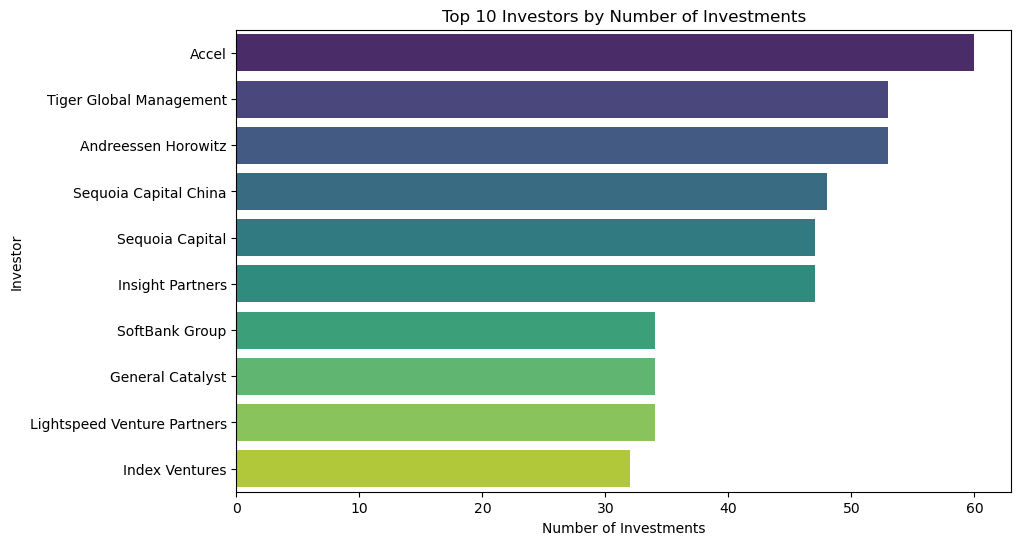

In [6]:
# Breakdown of companies by investors (assuming 'Select Investors' contains comma-separated names)
from collections import Counter

investor_list = df['Select Investors'].dropna().str.split(',')
investor_list = investor_list.explode().str.strip()
investor_counts = Counter(investor_list)
top_investors = pd.DataFrame(investor_counts.most_common(10), columns=['Investor', 'Count'])
print(top_investors)

# Visualize top investors
plt.figure(figsize=(10,6))
sns.barplot(data=top_investors, x='Count', y='Investor', palette='viridis')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Top 10 Investors by Number of Investments')
plt.show()

    Country/Region  Funding (M)
44   United States     281150.0
9            China     112438.0
19           India      47663.0
43  United Kingdom      30161.0
17         Germany      16394.0
16          France      12953.0
38          Sweden       9745.0
6           Brazil       9670.0
20       Indonesia       7231.0
7           Canada       6224.0


/var/folders/7m/b7rn5gqs2t3f0ylfxk_fh56w0000gn/T/ipykernel_49946/3619409982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funding_by_country.head(10), x='Country/Region', y='Funding (M)', palette='viridis')


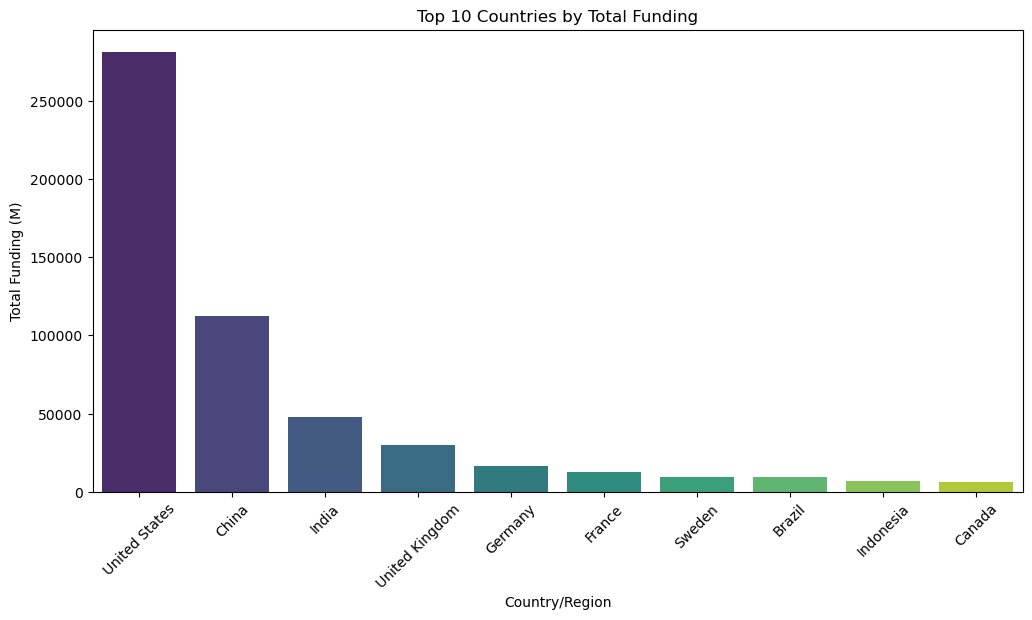

In [7]:
# Total funding (in millions) by country
funding_by_country = df.groupby('Country/Region')['Funding (M)'].sum().reset_index()
funding_by_country = funding_by_country.sort_values(by='Funding (M)', ascending=False)
print(funding_by_country.head(10))

# Visualize funding by country
plt.figure(figsize=(12,6))
sns.barplot(data=funding_by_country.head(10), x='Country/Region', y='Funding (M)', palette='viridis')
plt.xlabel('Country/Region')
plt.ylabel('Total Funding (M)')
plt.title('Top 10 Countries by Total Funding')
plt.xticks(rotation=45)
plt.show()

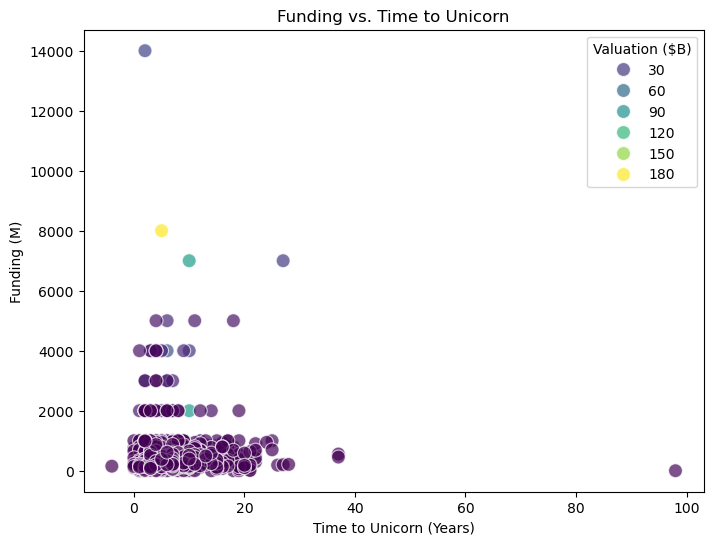

In [8]:
# Explore relationship between Funding and Time to Unicorn
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Time to Unicorn', y='Funding (M)', hue='Valuation ($B)', palette='viridis', s=100, alpha=0.7)
plt.xlabel('Time to Unicorn (Years)')
plt.ylabel('Funding (M)')
plt.title('Funding vs. Time to Unicorn')
plt.legend(title='Valuation ($B)')
plt.show()

## 6. Client-Requested Analysis

### 6.1 Hardware Companies in Beijing, San Francisco, or London
Filter for hardware companies and visualize their counts per city.

In [9]:
hardware_cities = ['Beijing', 'San Francisco', 'London']
hardware_companies = df[(df['Industry'].str.lower() == 'hardware') & (df['City'].isin(hardware_cities))]
print(hardware_companies.head())

           Company Valuation Date Joined  Industry           City  \
36         Bitmain      $12B  2018-07-06  Hardware        Beijing   
43   Global Switch      $11B  2016-12-22  Hardware         London   
147        Chipone       $5B  2021-12-16  Hardware        Beijing   
845        Density       $1B  2021-11-10  Hardware  San Francisco   
923          Geek+       $1B  2018-11-21  Hardware        Beijing   

     Country/Region      Continent  Year Founded Funding  \
36            China           Asia          2015   $765M   
43   United Kingdom         Europe          1998     $5B   
147           China           Asia          2008     $1B   
845   United States  North America          2014   $217M   
923           China           Asia          2015   $439M   

                                      Select Investors  Funding (M)  \
36   Coatue Management, Sequoia Capital China, IDG ...        765.0   
43   Aviation Industry Corporation of China, Essenc...       5000.0   
147  China 

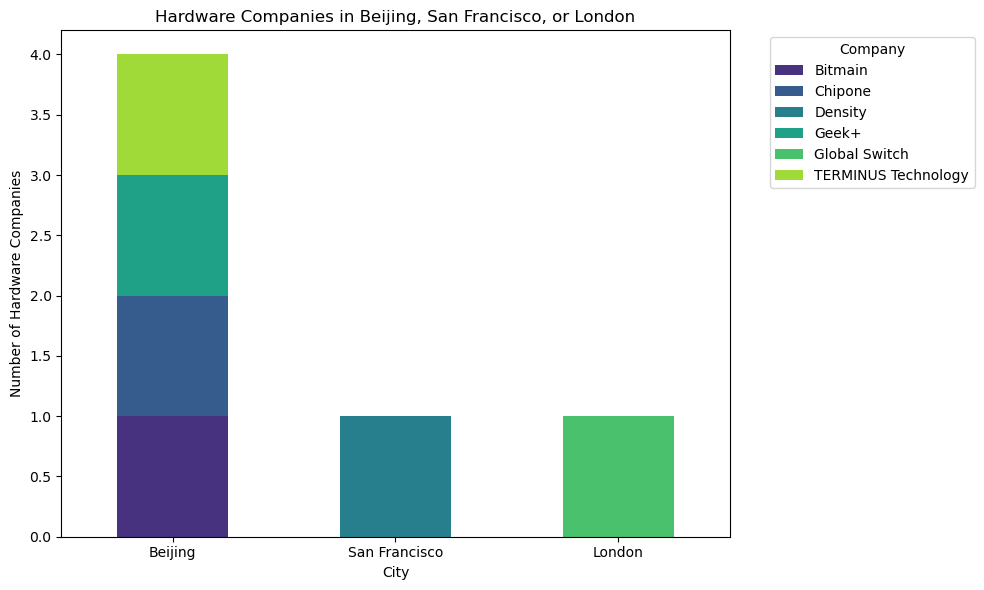

In [10]:
# Create a pivot table: count of companies for each city and company
hardware_pivot = hardware_companies.groupby(['City', 'Company']).size().unstack(fill_value=0)

# Ensure the cities appear in the desired order
hardware_pivot = hardware_pivot.reindex(hardware_cities)

# Create a custom color palette for the companies
num_companies = hardware_pivot.shape[1]
palette = sns.color_palette("viridis", num_companies) 

# Plot a stacked bar chart
ax = hardware_pivot.plot(kind='bar', 
                         stacked=True, 
                         figsize=(10,6), 
                         color=palette)

ax.set_xlabel("City")
ax.set_ylabel("Number of Hardware Companies")
ax.set_title("Hardware Companies in Beijing, San Francisco, or London")

# Place legend outside the plot
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 6.2 Artificial Intelligence Companies in London
Filter for AI companies in London and visualize valuation distributions.

In [11]:
ai_companies = df[(df['Industry'].str.lower() == 'artificial intelligence') & (df['City'] == 'London')]
print(ai_companies.head())

           Company Valuation Date Joined                 Industry    City  \
873   BenevolentAI       $1B  2015-06-02  Artificial intelligence  London   
1046     Tractable       $1B  2021-06-16  Artificial intelligence  London   

      Country/Region Continent  Year Founded Funding  \
873   United Kingdom    Europe          2013   $292M   
1046  United Kingdom    Europe          2014   $120M   

                                       Select Investors  Funding (M)  \
873                      Woodford Investment Management        292.0   
1046  Insight Partners, Ignition Partners, Georgian ...        120.0   

      Valuation ($B)  Year Joined  Time to Unicorn  
873              1.0         2015                2  
1046             1.0         2021                7  


## 7. Global Valuation Maps

We create two maps with log-transformed valuations using the 'verdis' palette:
- Companies joined after 2020
- Countries excluding the top 4 (US, China, India, UK) with a Europe-specific view

In [12]:
# Global Valuation Map: Companies Joined After 2020
after_2020 = df[df['Year Joined'] > 2020]
after_2020_agg = after_2020.groupby('Country/Region')['Valuation ($B)'].sum().reset_index()
after_2020_agg['log_valuation'] = np.log(after_2020_agg['Valuation ($B)'] + 1e-3)

fig1 = px.choropleth(after_2020_agg,
                     locations='Country/Region',
                     locationmode='country names',
                     color='log_valuation',
                     title='Global Valuation Map: Companies Joined After 2020 (Log Scale)',
                     color_continuous_scale='viridis',
                     labels={'log_valuation': 'Log Valuation ($B)'} )
fig1.show()

In [13]:
# Global Valuation Map: Excluding Top 4 Countries (US, China, India, UK)
excluded_countries = ['United States', 'China', 'India', 'United Kingdom']
global_excluded = df[~df['Country/Region'].isin(excluded_countries)]
global_excluded_agg = global_excluded.groupby('Country/Region')['Valuation ($B)'].sum().reset_index()
global_excluded_agg['log_valuation'] = np.log(global_excluded_agg['Valuation ($B)'] + 1e-3)

fig2 = px.choropleth(global_excluded_agg,
                     locations='Country/Region',
                     locationmode='country names',
                     color='log_valuation',
                     title='Global Valuation Map (Excluding US, China, India, UK) - Log Scale',
                     color_continuous_scale='viridis',
                     labels={'log_valuation': 'Log Valuation ($B)'} )
fig2.show()

# Europe-specific view
europe = global_excluded[df['Continent'] == 'Europe']
europe_agg = europe.groupby('Country/Region')['Valuation ($B)'].sum().reset_index()
europe_agg['log_valuation'] = np.log(europe_agg['Valuation ($B)'] + 1e-3)

fig3 = px.choropleth(europe_agg,
                     locations='Country/Region',
                     locationmode='country names',
                     color='log_valuation',
                     title='European Valuation Map (Excluding US, China, India, UK) - Log Scale',
                     color_continuous_scale='viridis',
                     labels={'log_valuation': 'Log Valuation ($B)'} )
fig3.show()

/var/folders/7m/b7rn5gqs2t3f0ylfxk_fh56w0000gn/T/ipykernel_49946/3778557162.py:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## 8. Summary of Findings & Recommendations

**Key Findings:**
- Missing data was handled by filling non-critical fields and dropping rows with missing location data.
- Hardware companies are primarily located in Beijing, San Francisco, and London, while AI companies in London exhibit a narrow valuation range.
- Investor analysis reveals the top investors by frequency, and total funding by country highlights key markets.
- Time-to-unicorn analysis shows the period between founding and achieving unicorn status, with funding levels correlating to faster unicorn achievement in some cases.
- Global valuation maps (using log-transformed scales) expose trends that raw values would obscure.

**Recommendations:**
- Focus further investigation on markets and investors showing rapid unicorn growth.
- Integrate additional metrics (e.g., revenue, headcount) for more comprehensive analysis.
- Develop interactive dashboards for stakeholders to dynamically explore these trends.

## 9. Next Steps & Appendix

**Next Steps:**
- Incorporate further business metrics to deepen insights.
- Create interactive visualizations and dashboards for dynamic analysis.
- Consider predictive modeling for forecasting unicorn trends.

**Appendix & References:**
- Dataset: Unicorn_Companies.csv
- Libraries: pandas, numpy, matplotlib, seaborn, plotly, missingno